# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [5]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [6]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [7]:
#Selection of the first two features
X, y = iris.data[:,:2], iris.target

#For keeping only classses 0 and 1
X,y = X[y < 2], y[y < 2]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
#accuracy
print("Model accuracy:" ,SVMmodel.score(X_test,y_test))


Model accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

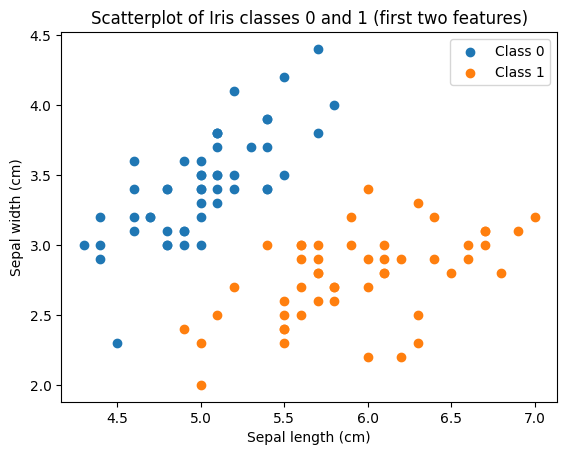

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Scatterplot of Iris classes 0 and 1 (first two features)')
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [9]:
from sklearn.svm import SVC

# Train with default C (C=1.0)
SVMmodel_default_C = SVC(kernel='linear')
SVMmodel_default_C.fit(X_train, y_train)
print(f"Accuracy with default C: {SVMmodel_default_C.score(X_test, y_test)}")

# Train with C=200
SVMmodel_C_200 = SVC(kernel='linear', C=200)
SVMmodel_C_200.fit(X_train, y_train)
print(f"Accuracy with C=200: {SVMmodel_C_200.score(X_test, y_test)}")

# You can assign the model with C=200 to the global SVMmodel variable if you want to use it later
SVMmodel = SVMmodel_C_200

Accuracy with default C: 1.0
Accuracy with C=200: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

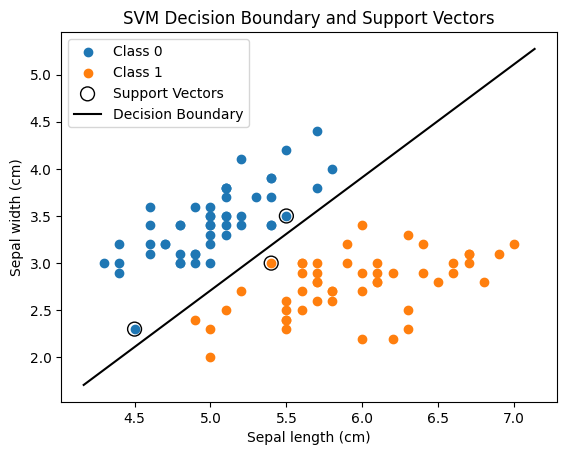

In [13]:
import numpy as np
import matplotlib.pyplot as plt

supvectors = SVMmodel.support_vectors_
# Separating line coefficients:
W = SVMmodel.coef_
b = SVMmodel.intercept_

# Plot the data points again
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1')

# Plot support vectors
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the decision boundary
# The decision boundary is w0*x0 + w1*x1 + b = 0
# We can rearrange this to solve for x1: x1 = (-w0*x0 - b) / w1
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx = np.linspace(x_min, x_max, 100)
yy = (-W[0, 0] * xx - b[0]) / W[0, 1]

plt.plot(xx, yy, 'k-', label='Decision Boundary')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('SVM Decision Boundary and Support Vectors')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

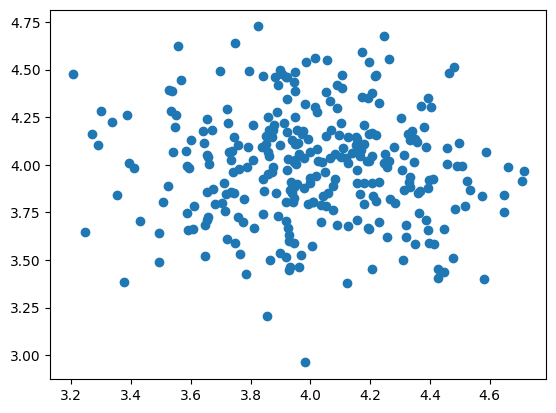

In [14]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

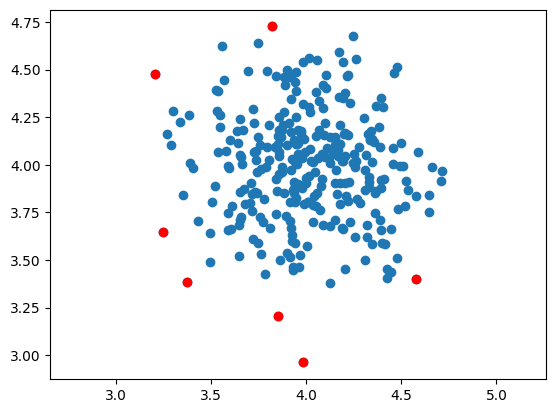

In [15]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

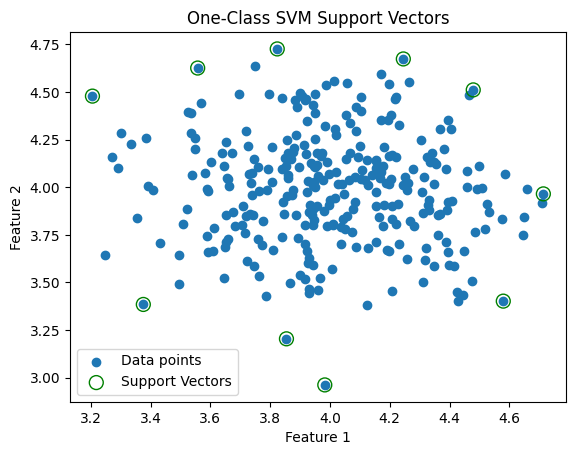

In [16]:
plt.scatter(x[:,0], x[:,1], label='Data points')
plt.scatter(SVMmodelOne.support_vectors_[:,0], SVMmodelOne.support_vectors_[:,1], s=100, facecolors='none', edgecolors='green', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM Support Vectors')
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


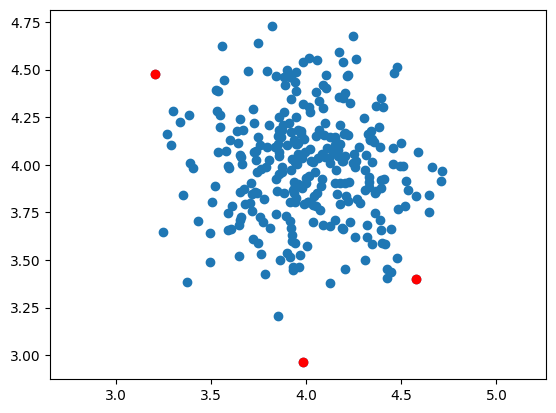

In [17]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()